#### Step 1. 데이터 병합하기

In [1]:
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
from matplotlib import rc
from matplotlib import font_manager
import matplotlib.pyplot as plt

In [2]:
# 멕의 경우 한글 나오게 하기
# plt.rc('font', family='AppleGothic')
plt.rc('font', family='Malgun Gothic')

In [3]:
# 시트명 정의하기: list comprehension
sheet_names = ["{}월".format(x) for x in range(1,13)]
sheet_names

['1월', '2월', '3월', '4월', '5월', '6월', '7월', '8월', '9월', '10월', '11월', '12월']

In [4]:
# concat을 데이터 병합
merged_df = pd.DataFrame()
for sn in sheet_names:
    df = pd.read_excel("./data/월별매출데이터.xlsx", sheet_name = sn, skiprows = range(6)).iloc[:,1:]
    merged_df = pd.concat([merged_df, df], axis = 0, ignore_index = True)

In [12]:
merged_df["일자"]

0          2018.1.1
1          2018.1.1
2          2018.1.1
3          2018.1.1
4          2018.1.1
            ...    
18224    2018-12-31
18225    2018-12-31
18226    2018-12-31
18227    2018-12-31
18228    2018-12-31
Name: 일자, Length: 18229, dtype: object

In [6]:
merged_df.head()

,일자,지점,품명,수량,주문인 ID,수령 주소,주문 상태,결제 수단
0,2018.1.1,지점1,제품B,3,C-168,서울특별시 동작구 흑석동,주문완료,인터넷뱅킹
1,2018.1.1,지점2,제품F,8,C-87,서울특별시 서대문구 신촌동,배송완료,신용카드
2,2018.1.1,지점4,제품B,2,C-158,서울특별시 종로구 종로5가,배송완료,휴대폰결제
3,2018.1.1,지점3,제품D,7,C-307,서울특별시 서대문구 냉천동,주문완료,휴대폰결제
4,2018.1.1,지점2,제품E,9,C-342,서울특별시 종로구 묘동,배송완료,인터넷뱅킹


#### Step 2. 포맷 통일 및 변수 추가

In [7]:
# str.replace를 사용하여 '.'을 '-'로 변경
# 문자열 검색
merged_df['일자'] = merged_df['일자'].replace({'.':'-'})
merged_df['일자']

0          2018.1.1
1          2018.1.1
2          2018.1.1
3          2018.1.1
4          2018.1.1
            ...    
18224    2018-12-31
18225    2018-12-31
18226    2018-12-31
18227    2018-12-31
18228    2018-12-31
Name: 일자, Length: 18229, dtype: object

In [8]:
price_df = pd.read_excel("./data/제품별_가격정보.xlsx")
price_df # 원활한 분석을 위해, 행과 열을 바꿀 필요가 있음

,제품,제품A,제품B,제품C,제품D,제품E,제품F
0,가격,20000,5000,10000,8000,30000,15000


In [9]:
price_df = price_df.T # .T: 전치 행렬 반환
price_df # index: 제품, 0: 가격

,0
제품,가격
제품A,20000
제품B,5000
제품C,10000
제품D,8000
제품E,30000
제품F,15000


In [45]:
# to_dict(): series를 dictionary로 변환 (index -> key, data -> value)
price_dict = price_df.iloc[1:,:]
price_dict

,0
제품A,20000
제품B,5000
제품C,10000
제품D,8000
제품E,30000
제품F,15000


In [25]:
price_dict = price_dict.set_index('제품')['간격'].to_dict()
price_dict

KeyError: "None of ['제품'] are in the columns"

In [11]:
merged_df['품명'].head()

0    제품B
1    제품F
2    제품B
3    제품D
4    제품E
Name: 품명, dtype: object

In [16]:
# replace: 품명 컬럼에 price dict의 key가 있으면 value로 바꿈
# 새로운 변수 정의
merged_df['가격'] = merged_df['품명'].map(price_dict)
merged_df['가격'] 

0         {0: 5000}
1        {0: 15000}
2         {0: 5000}
3         {0: 8000}
4        {0: 30000}
            ...    
18224    {0: 15000}
18225     {0: 8000}
18226     {0: 8000}
18227     {0: 5000}
18228     {0: 8000}
Name: 가격, Length: 18229, dtype: object

In [17]:
# 주문 금액 변수 추가
merged_df['주문 금액'] =  merge_df['수량']*merge_df['가격']
merged_df['주문 금액']
# ndarray 브로드캐스팅 + 유니버설 함수

NameError: name 'merge_df' is not defined

In [68]:
merged_df.head()

,일자,지점,품명,수량,주문인 ID,수령 주소,주문 상태,결제 수단,가격,주문 금액,월
0,2018-1-1,지점1,제품B,3,C-168,서울특별시 동작구 흑석동,주문완료,인터넷뱅킹,5000,15000,1
1,2018-1-1,지점2,제품F,8,C-87,서울특별시 서대문구 신촌동,배송완료,신용카드,15000,120000,1
2,2018-1-1,지점4,제품B,2,C-158,서울특별시 종로구 종로5가,배송완료,휴대폰결제,5000,10000,1
3,2018-1-1,지점3,제품D,7,C-307,서울특별시 서대문구 냉천동,주문완료,휴대폰결제,8000,56000,1
4,2018-1-1,지점2,제품E,9,C-342,서울특별시 종로구 묘동,배송완료,인터넷뱅킹,30000,270000,1


#### Step 3. 월별 매출 추이 파악

In [87]:
# 일자 변수에서 월만 추출 (일자 변수가 object type이므로 split을 하더라도 object여서 astype으로 int로 변경함)
merged_df['월'] = 
merged_df['월']

0         1
1         1
2         1
3         1
4         1
         ..
18224    12
18225    12
18226    12
18227    12
18228    12
Name: 월, Length: 18229, dtype: int64

In [89]:
%matplotlib inline
import matplotlib.pyplot as plt
# plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 20
plt.rcParams["figure.figsize"] = (8, 10)

In [97]:
# 월과 품목에 따른 주문 금액 합계 계산

grouped_df_by_month = 
grouped_df_by_month_and_product = 

In [98]:
grouped_df_by_month.head()

,월,주문 금액
0,1,103829000
1,2,94831000
2,3,100923000
3,4,111141000
4,5,100510000


In [73]:
grouped_df_by_month_and_product.head()

,월,품명,주문 금액
0,1,제품A,6720000
1,1,제품B,7530000
2,1,제품C,17020000
3,1,제품D,21064000
4,1,제품E,29100000


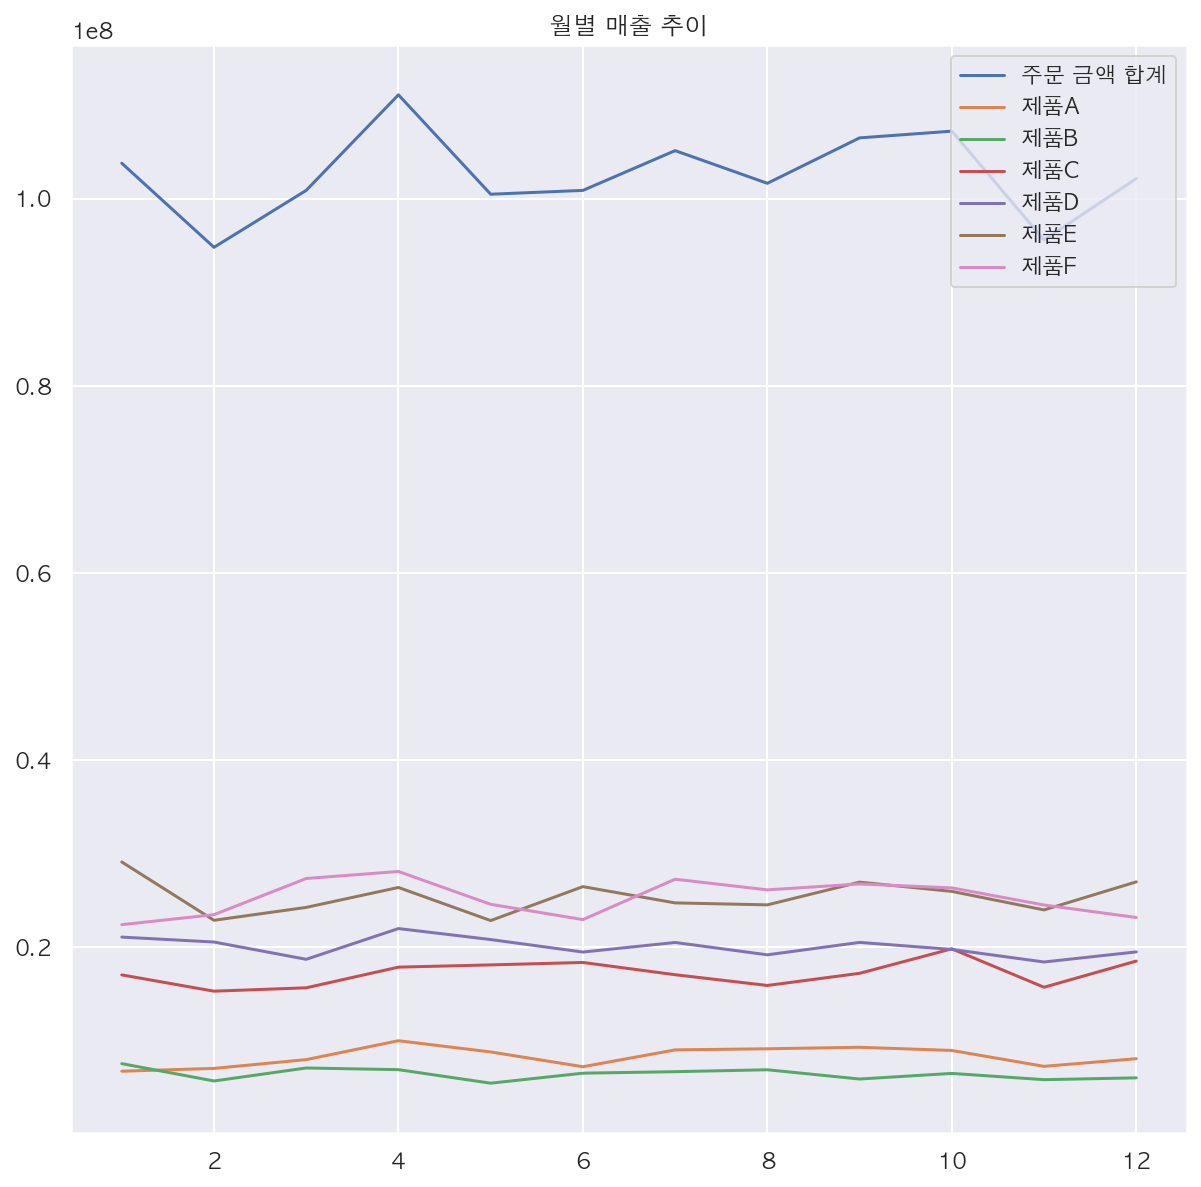

In [83]:
plt.title("월별 매출 추이")
plt.plot(grouped_df_by_month['월'],
         grouped_df_by_month['주문 금액'],
         label = "주문 금액 합계")

for product in grouped_df_by_month_and_product['품명'].unique():
    plt.plot(grouped_df_by_month_and_product['월'].unique(), # 월의 개수가 12 * 품목 개수라는 것에 주의
             grouped_df_by_month_and_product.loc[grouped_df_by_month_and_product['품명'] == product]['주문 금액'], # 마스킹 검색            
             label = product)

plt.legend(loc = 'upper right')
plt.show()

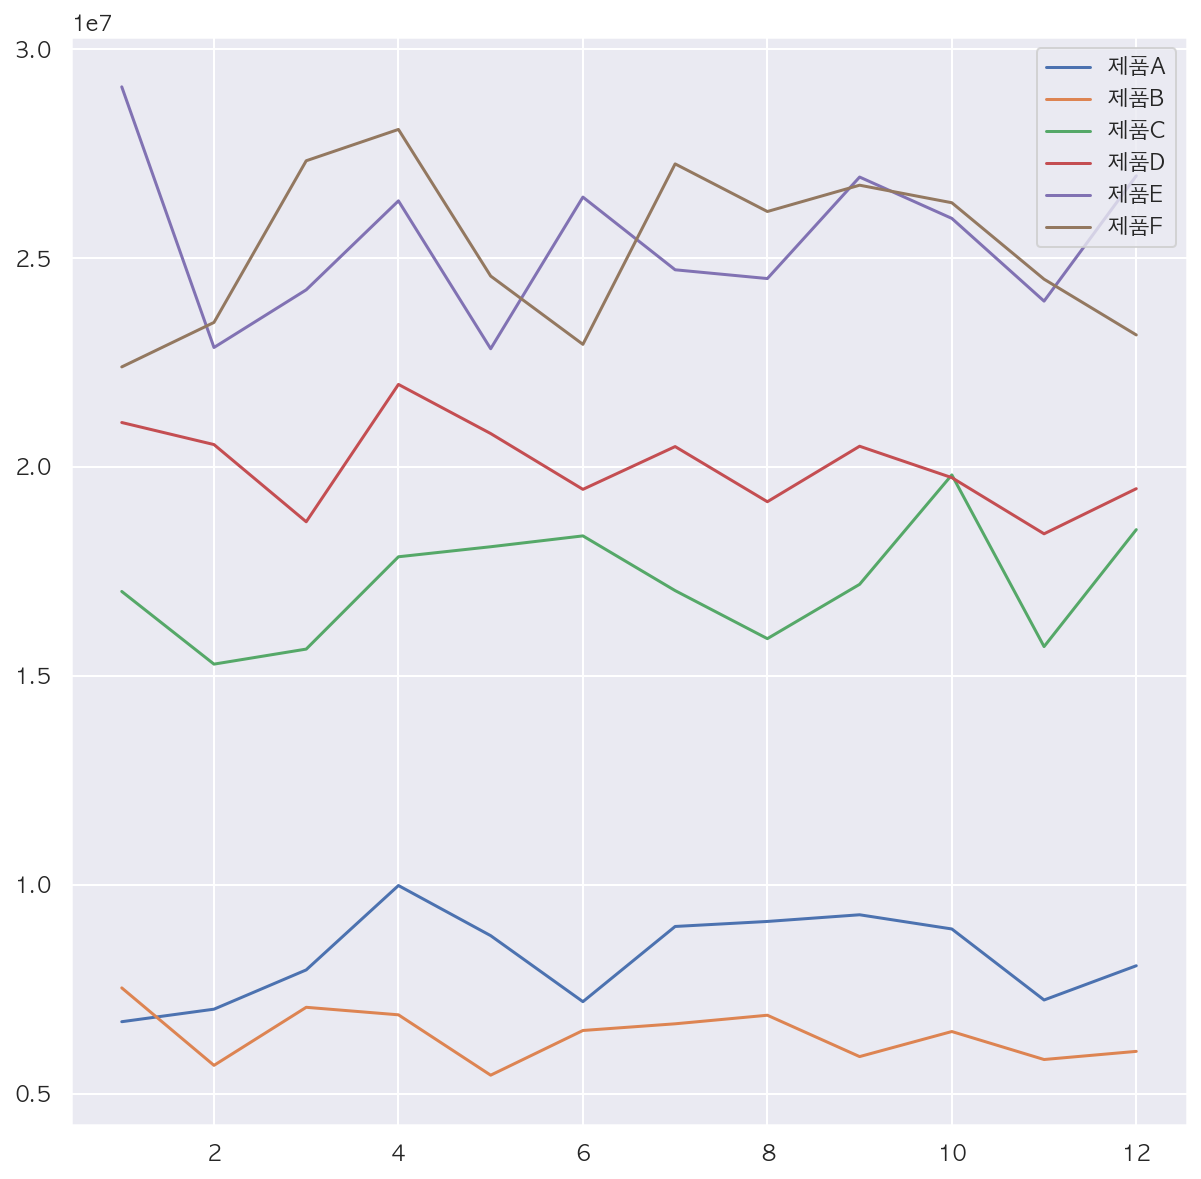

In [84]:
for product in grouped_df_by_month_and_product['품명'].unique():
    plt.plot(grouped_df_by_month_and_product['월'].unique(), # 월의 개수가 12 * 품목 개수라는 것에 주의
             grouped_df_by_month_and_product.loc[grouped_df_by_month_and_product['품명'] == product]['주문 금액'], # 마스킹 검색            
             label = product)

plt.legend(loc = 'upper right')
plt.show()

#### Step 4. 다양한 조건에 따른 판매 통계 분석

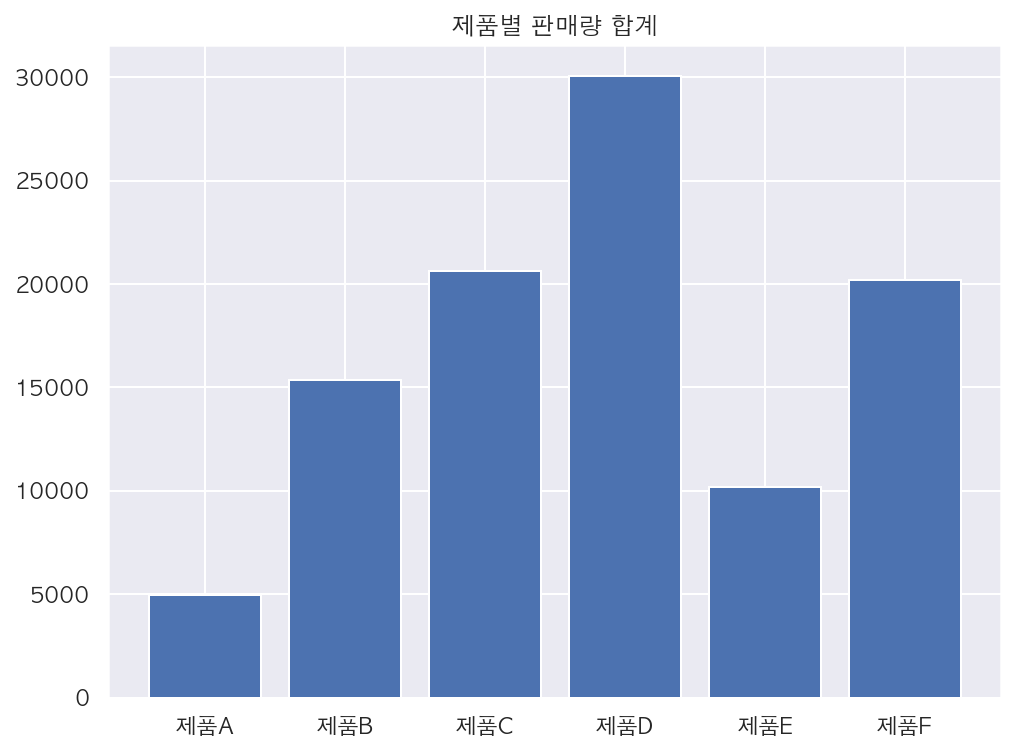

In [85]:
plt.rcParams["figure.figsize"] = (8, 6)

# 제품별 판매량 통계
grouped_df_by_product = merged_df.groupby('품명', as_index = False)['수량'].sum()
plt.title("제품별 판매량 합계")
plt.bar(grouped_df_by_product['품명'], grouped_df_by_product['수량'])
plt.show()

In [77]:
# 제품과 결제 수단에 따른 판매량 분석
pivot_df = 
pivot_df

결제 수단,무통장입금,신용카드,인터넷뱅킹,휴대폰결제
품명,,,,
제품A,108222.222222,118846.153846,107621.621622,118317.757009
제품B,28542.435424,28158.730159,28349.358974,27596.899225
제품C,53177.083333,53936.011905,54774.774775,56472.081218
제품D,45408.849558,44067.439410,44086.021505,45200.000000
제품E,171117.318436,167556.270096,169794.188862,181829.268293
제품F,85277.777778,82556.818182,83940.269750,82780.748663


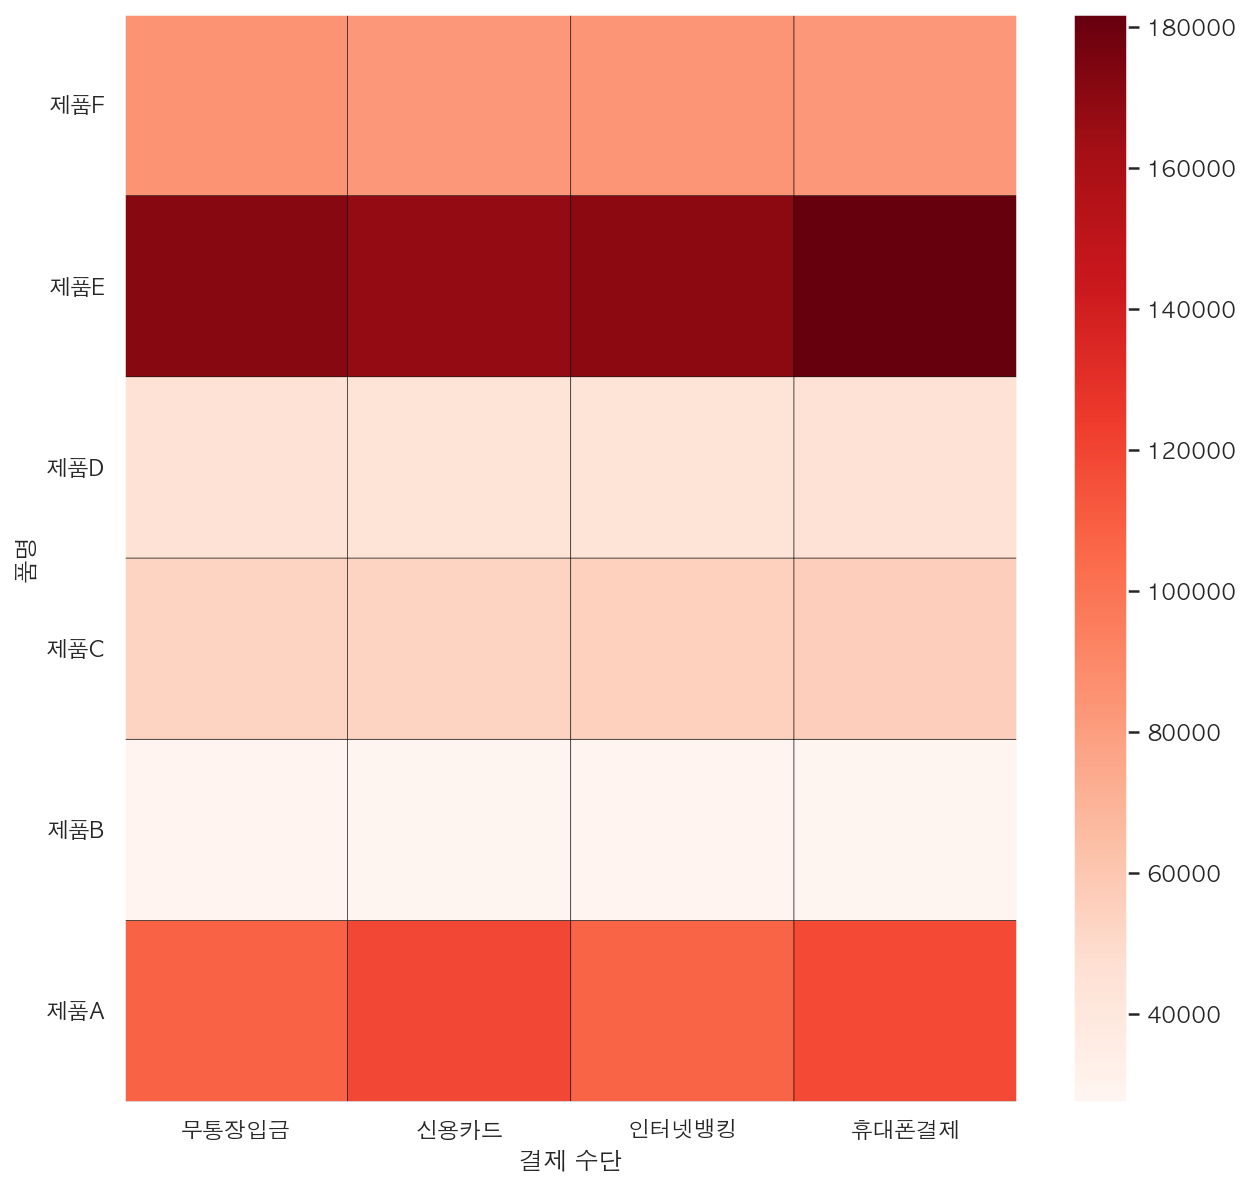

In [101]:
plt.rcParams["figure.figsize"] = (10, 10)

plt.xlabel('결제 수단')
plt.ylabel('품명')

plt.xticks(np.arange(0.5, len(pivot_df.columns)), pivot_df.columns)
plt.yticks(np.arange(0.5, len(pivot_df.index)), pivot_df.index)

plt.pcolor(pivot_df, edgecolors = 'black', cmap = plt.cm.Reds)
plt.colorbar()

#### Step 5. 충성 고객 찾기

In [79]:
# 주문 금액 합계 기준 상위 10% 고객 찾기
grouped_df_by_customer = 
grouped_df_by_customer.head()

,sum,count
주문인 ID,,
C-0,1657000,34
C-1,2527000,36
C-10,2522000,34
C-100,3591000,46
C-101,2657000,32


In [80]:
threshold_1 =  # 기준1 - 구매 금액 합계 기준 상위 10%에 속하기 위한 기준 .quantile(0.9)
threshold_2 = # 기준2 - 구매 빈도 기준 상위 10%에 속하기 위한 기준 .quantile(0.9)

print(threshold_1, threshold_2)

3188000.0 44.10000000000002


In [81]:
cond1 = # 기준 1을 만족하는지 여부
cond2 = # 기준 2를 만족하는지 여부

grouped_df_by_customer.loc[cond1 & cond2].sort_values(by = ['sum', 'count'], ascending = False).head(10)

,sum,count
주문인 ID,,
C-450,4327000,51
C-288,4219000,50
C-320,3921000,63
C-106,3888000,46
C-189,3864000,49
C-389,3792000,47
C-475,3648000,46
C-439,3611000,50
C-100,3591000,46
